In [1]:
import numpy as np
import scipy.special as sps
import gstools as gs

In [2]:
## NOTE: custom Matern model doesn't look right, use default for now.

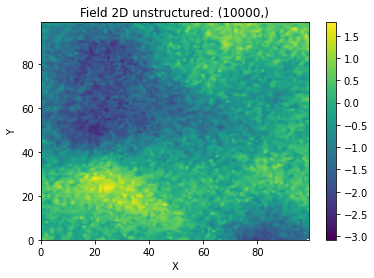

In [21]:
params = {
    "var": 2,
    "nu": 1.5,
    "len_scale": 30,
    "nugget": 0.1
}

x = np.random.randint(0, 100, size=10000)
y = np.random.randint(0, 100, size=10000)
model = gs.Matern(dim=2, **params)
srf = gs.SRF(model, seed=19970221)
field = srf((x, y))

srf.vtk_export("field")
srf.plot();

In [22]:
bins = np.arange(60)
bin_center, gamma = gs.vario_estimate_unstructured((x, y), field, bins, estimator="cressie")

In [23]:
fit_model = gs.Matern(dim=2)
fit_model.set_arg_bounds(var=[0.1, 10], nu=[0.2, 5], len_scale=[10, 100])
fit_model.fit_variogram(bin_center, gamma, nugget=False)

({'var': 3.501203536204718,
  'len_scale': 99.99999999999999,
  'nugget': 0.0,
  'nu': 0.5441383529214364},
 array([[ 1.36705634e+00,  5.00239768e+01, -4.05974693e-02],
        [ 5.00239768e+01,  1.83586205e+03, -1.51327550e+00],
        [-4.05974693e-02, -1.51327550e+00,  1.35781340e-03]]))

Matern(dim=2, var=3.501203536204718, len_scale=99.99999999999999, nugget=0.0, anis=[1.], angles=[0.], nu=0.5441383529214364)


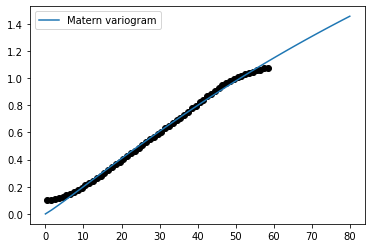

In [24]:
ax = fit_model.plot(x_max=80)
ax.scatter(bin_center, gamma, color="black")
print(fit_model)